# Final project: Classification of intraplate earthquakes -- Group3
### Group Members: Rui Gong, Neelarun Mukherjee, Rohan Rao, Akshika Rohatgi, and Akhilesh Tiwari

# Introduction

In the field of seismology, there has long been a focus on understanding the mechanism behind intraplate earthquakes. Establishing connections between intraplate seismic activities and various tectonic components within stable continents holds significant importance in unraveling the mechanism of intraplate earthquakes. 
Our project proposes to utilize machine-learning models to classify different types of intraplate earthquake events based on several features, like latitude, longitude, depth, moment magnitude, etc. We will use the global earthquake catalog for intraplate earthquakes from the United States Geological Survey (https://earthquake.usgs.gov/data/scr_catalog.php) to accomplish our objective. 
This dataset contains 1373 events from the year 495 to 2003 and 1221 of them are tectonic earthquake events. We plan to classify the types of these tectonic earthquake events into 3 categories: rifts, passive margins, and non rifted crust.

# Preprocessing

### 1. Import essential libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### 2. Load dataset

In [2]:
df1=pd.read_csv('raw_data.csv')
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 1373 non-null   int64  
 1   Hist_instr                           1373 non-null   object 
 2   Latitude                             1373 non-null   float64
 3   Longitude                            1373 non-null   float64
 4   Origin time                          1271 non-null   float64
 5   Continent                            1373 non-null   int64  
 6   Depth                                1016 non-null   float64
 7   Moment magnitude                     1373 non-null   float64
 8   Uncertainty                          1373 non-null   float64
 9   Mb                                   629 non-null    float64
 10  Ms                                   256 non-null    float64
 11  Ml                            

,Date,Hist_instr,Latitude,Longitude,Origin time,Continent,Depth,Moment magnitude,Uncertainty,Mb,...,Dip direction T-axis,Dip T-axis,Dip direction B-axis,Dip B-axis,Stress regime,Azimuth Shmax,IDP,Date main event,Type of event,Tectonic association
0,4950331,hist,37.500,121.500,NaN,2,NaN,5.2,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,tect.,2.0
1,8270000,hist,51.100,12.800,NaN,3,NaN,4.8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,tect.,0.0
2,9991000,hist,31.800,119.900,NaN,2,NaN,4.9,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,tect.,0.0
3,10620208,hist,49.000,12.000,NaN,3,NaN,5.5,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,tect.,0.0
4,10671100,hist,23.600,116.500,NaN,2,NaN,6.1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,tect.,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,20030805,instr,23.689,70.435,110801.91,4,10.0,5.0,0.3,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,D,20010126.0,tect.,0.0
1369,20030810,instr,27.216,75.739,111754.38,4,10.0,4.5,0.4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,tect.,2.0
1370,20030816,instr,43.770,119.643,105842.78,2,24.0,5.4,0.2,5.5,...,174.0,27.0,21.0,60.0,SS,271.0,I,NaN,tect.,0.0
1371,20030811,instr,-18.436,147.114,70430.00,1,5.0,4.8,0.3,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,tect.,1.0


### 3. Filter dataset and choose features

In [3]:
df2=df1[(df1['Type of event'] == 'tect.')]
df2=df2[['Latitude','Longitude','Continent','Depth','Moment magnitude','Seismic moment','Tectonic association']]
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
Index: 1221 entries, 0 to 1371
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Latitude              1221 non-null   float64
 1   Longitude             1221 non-null   float64
 2   Continent             1221 non-null   int64  
 3   Depth                 866 non-null    float64
 4   Moment magnitude      1221 non-null   float64
 5   Seismic moment        1221 non-null   float64
 6   Tectonic association  1221 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 76.3 KB


,Latitude,Longitude,Continent,Depth,Moment magnitude,Seismic moment,Tectonic association
0,37.500,121.500,2,NaN,5.2,7.600000e+16,2.0
1,51.100,12.800,3,NaN,4.8,1.900000e+16,0.0
2,31.800,119.900,2,NaN,4.9,2.100000e+16,0.0
3,49.000,12.000,3,NaN,5.5,1.700000e+17,0.0
4,23.600,116.500,2,NaN,6.1,1.700000e+18,0.0
...,...,...,...,...,...,...,...
1367,65.989,5.477,3,10.0,4.8,2.000000e+16,1.0
1368,23.689,70.435,4,10.0,5.0,3.600000e+16,0.0
1369,27.216,75.739,4,10.0,4.5,6.800000e+15,2.0
1370,43.770,119.643,2,24.0,5.4,1.400000e+17,0.0


Our purpose is to classify tectonic earthquake events, so we filter non-tectonic events in the dataset. Then, we choose 'Latitude', 'Longitude', 'Continent', 'Depth', 'Moment magnitude', and 'Seismic moment' as features based on completeness of data and geological background. Meanwhile, we regard 'Tectonic association' as final target. 

### 4. Check whether or not this dataset contains null values before going any further

In [4]:
print('There is duplicate row:',any(df2.duplicated()))
df3=df2.drop_duplicates()
print('There is duplicate row:',any(df3.duplicated()))
nan_index = df3.isna()
print(nan_index.sum(),'\n')
df3.info()
df3

There is duplicate row: True
There is duplicate row: False
Latitude                  0
Longitude                 0
Continent                 0
Depth                   352
Moment magnitude          0
Seismic moment            0
Tectonic association      0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 1216 entries, 0 to 1371
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Latitude              1216 non-null   float64
 1   Longitude             1216 non-null   float64
 2   Continent             1216 non-null   int64  
 3   Depth                 864 non-null    float64
 4   Moment magnitude      1216 non-null   float64
 5   Seismic moment        1216 non-null   float64
 6   Tectonic association  1216 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 76.0 KB


,Latitude,Longitude,Continent,Depth,Moment magnitude,Seismic moment,Tectonic association
0,37.500,121.500,2,NaN,5.2,7.600000e+16,2.0
1,51.100,12.800,3,NaN,4.8,1.900000e+16,0.0
2,31.800,119.900,2,NaN,4.9,2.100000e+16,0.0
3,49.000,12.000,3,NaN,5.5,1.700000e+17,0.0
4,23.600,116.500,2,NaN,6.1,1.700000e+18,0.0
...,...,...,...,...,...,...,...
1367,65.989,5.477,3,10.0,4.8,2.000000e+16,1.0
1368,23.689,70.435,4,10.0,5.0,3.600000e+16,0.0
1369,27.216,75.739,4,10.0,4.5,6.800000e+15,2.0
1370,43.770,119.643,2,24.0,5.4,1.400000e+17,0.0


We find that the feature 'Depth' contains 352 null values.

### 5. Use linear regression method to get the missing values of 'Depth'

In this task, features are 'Latitude', 'Longitude', 'Continent', 'Moment magnitude', and 'Seismic moment', while the target is 'Depth'. Next, we prepare datasets for training, validation, and testing.

In [5]:
#separate
df_notnull=df3.loc[df3['Depth'].notnull()]
df_isnull=df3.loc[df3['Depth'].isnull()]

#normalization
stand_scaler1=preprocessing.StandardScaler()
notnull_x=stand_scaler1.fit_transform(df_notnull[['Latitude','Longitude','Continent','Moment magnitude','Seismic moment']])
df_notnull_x=pd.DataFrame(notnull_x,columns=['Latitude','Longitude','Continent','Moment magnitude','Seismic moment'],index=df_notnull.index)

stand_scaler2=preprocessing.StandardScaler()
notnull_y=stand_scaler2.fit_transform(df_notnull[['Depth']])
df_notnull_y=pd.DataFrame(notnull_y,columns=['Depth'],index=df_notnull.index)

stand_scaler3=preprocessing.StandardScaler()
isnull_x=stand_scaler3.fit_transform(df_isnull[['Latitude','Longitude','Continent','Moment magnitude','Seismic moment']])
df_isnull_x=pd.DataFrame(isnull_x,columns=['Latitude','Longitude','Continent','Moment magnitude','Seismic moment'],index=df_isnull.index)

#prepare datasets for training and validation
x_train,x_vali,y_train,y_vali=train_test_split(df_notnull_x,df_notnull_y,test_size=0.25,random_state=1234)

#df_notnull[['Latitude','Longitude','Continent','Moment magnitude','Seismic moment']].head()
#df_notnull[['Depth']].head()
#df_isnull[['Latitude','Longitude','Continent','Moment magnitude','Seismic moment']].head()

Build linear regression models (Linear Regression, Ridge Regression and Lasso Regression) to predict 'Depth'.

In [6]:
#store model parameters
coef=pd.DataFrame(index=x_train.columns)
print('Please wait for a few seconds...','\n')

#Linear Regression
linear=LinearRegression()
linear.fit(x_train,y_train)
coef['Linear Regression']=linear.coef_[0]
print(linear.coef_,'\n')

#Ridge Regression
Lambdas=np.logspace(-5,2,200)
ridge_cv=RidgeCV(alphas=Lambdas,scoring='neg_mean_squared_error',cv=10)
ridge_cv.fit(x_train,y_train)
ridge_best_lambda=ridge_cv.alpha_
ridge=Ridge(alpha=ridge_best_lambda)
ridge.fit(x_train,y_train)
coef['Ridge Regression']=ridge.coef_[0]
print('ridge_best_lambda:',ridge_best_lambda,'\n')
print(ridge.coef_,'\n')

#Lasso Regression
lasso_cv=LassoCV(alphas=Lambdas,cv=10,max_iter=10000)
lasso_cv.fit(x_train,y_train)
lasso_best_lambda=lasso_cv.alpha_
lasso=Lasso(alpha=lasso_best_lambda,max_iter=10000)
lasso.fit(x_train,y_train)
coef['Lasso Regression']=lasso.coef_
print('lasso_best_lambda:',lasso_best_lambda,'\n')
print(lasso.coef_,'\n')

print(coef,'\n\n','Done')

Please wait for a few seconds... 

[[ 0.07596545  0.13739973 -0.06469641 -0.03762713  0.08342479]] 

ridge_best_lambda: 66.69919663030115 

[[ 0.05921993  0.1204393  -0.06000018 -0.02839663  0.06569336]] 

lasso_best_lambda: 0.0013987131026472386 

[ 0.07259531  0.13586609 -0.0624951  -0.03457635  0.07907868] 

                  Linear Regression  Ridge Regression  Lasso Regression
Latitude                   0.075965          0.059220          0.072595
Longitude                  0.137400          0.120439          0.135866
Continent                 -0.064696         -0.060000         -0.062495
Moment magnitude          -0.037627         -0.028397         -0.034576
Seismic moment             0.083425          0.065693          0.079079 

 Done


Let's compare the mean square error (MSE) next.  

In [7]:
#Linear Regression
train_MSE1=mean_squared_error(linear.predict(x_train),y_train)
vali_MSE1=mean_squared_error(linear.predict(x_vali),y_vali)
print('MSE -- Linear Regression -- Training:',train_MSE1)
print('MSE -- Linear Regression -- Validation:',vali_MSE1)

#Ridge Regression
train_MSE2=mean_squared_error(ridge.predict(x_train),y_train)
vali_MSE2=mean_squared_error(ridge.predict(x_vali),y_vali)
print('MSE -- Ridge Regression -- Training:',train_MSE2)
print('MSE -- Ridge Regression -- Validation:',vali_MSE2)

#Lasso Regression
train_MSE3=mean_squared_error(lasso.predict(x_train),y_train)
vali_MSE3=mean_squared_error(lasso.predict(x_vali),y_vali)
print('MSE -- Lasso Regression -- Training:',train_MSE3)
print('MSE -- Lasso Regression -- Validation:',vali_MSE3)



MSE -- Linear Regression -- Training: 0.9476895459271438
MSE -- Linear Regression -- Validation: 1.1089822992398382
MSE -- Ridge Regression -- Training: 0.9481777570844825
MSE -- Ridge Regression -- Validation: 1.0972125550033562
MSE -- Lasso Regression -- Training: 0.9477098289516432
MSE -- Lasso Regression -- Validation: 1.1061903039962386


For validation, Ridge Regression has the minimum value of MSE. So we use Ridge Regression for testing.

In [8]:
#predict
isnull_y=ridge.predict(df_isnull_x)

#reverse normalization
df_isnull_y_r=stand_scaler2.inverse_transform(isnull_y)
df_isnull_y_r=pd.DataFrame(df_isnull_y_r,columns=['Depth'],index=df_isnull.index)
print("There is no negative value in 'Depth':",sum(df_isnull_y_r['Depth']>=0)==df_isnull_y_r.shape[0])

df_isnull_x_r=stand_scaler3.inverse_transform(isnull_x)
df_isnull_x_r=pd.DataFrame(df_isnull_x_r,columns=['Latitude','Longitude','Continent','Moment magnitude','Seismic moment'],index=df_isnull.index)

df_notnull_y_r=stand_scaler2.inverse_transform(notnull_y)
df_notnull_y_r=pd.DataFrame(df_notnull_y_r,columns=['Depth'],index=df_notnull.index)

df_notnull_x_r=stand_scaler1.inverse_transform(notnull_x)
df_notnull_x_r=pd.DataFrame(df_notnull_x_r,columns=['Latitude','Longitude','Continent','Moment magnitude','Seismic moment'],index=df_notnull.index)

#df_notnull_x_r.head()
#df_notnull_y_r.head()
#df_isnull_x_r.head()

There is no negative value in 'Depth': True


Get final dataset after preprocessing.

In [9]:
df_isnull[['Depth']]=df_isnull_y_r[['Depth']]
df_isnull[['Latitude','Longitude','Continent','Moment magnitude','Seismic moment']]=df_isnull_x_r[['Latitude','Longitude','Continent','Moment magnitude','Seismic moment']]
df_notnull[['Depth']]=df_notnull_y_r[['Depth']]
df_notnull[['Latitude','Longitude','Continent','Moment magnitude','Seismic moment']]=df_notnull_x_r[['Latitude','Longitude','Continent','Moment magnitude','Seismic moment']]
df=pd.concat([df_notnull,df_isnull],axis=0).sort_index()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 1216 entries, 0 to 1371
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Latitude              1216 non-null   float64
 1   Longitude             1216 non-null   float64
 2   Continent             1216 non-null   float64
 3   Depth                 1216 non-null   float64
 4   Moment magnitude      1216 non-null   float64
 5   Seismic moment        1216 non-null   float64
 6   Tectonic association  1216 non-null   float64
dtypes: float64(7)
memory usage: 76.0 KB


,Latitude,Longitude,Continent,Depth,Moment magnitude,Seismic moment,Tectonic association
0,37.500,121.500,2.0,21.334715,5.2,7.600000e+16,2.0
1,51.100,12.800,3.0,19.450478,4.8,1.900000e+16,0.0
2,31.800,119.900,2.0,21.323722,4.9,2.100000e+16,0.0
3,49.000,12.000,3.0,19.013679,5.5,1.700000e+17,0.0
4,23.600,116.500,2.0,20.445688,6.1,1.700000e+18,0.0
...,...,...,...,...,...,...,...
1367,65.989,5.477,3.0,10.000000,4.8,2.000000e+16,1.0
1368,23.689,70.435,4.0,10.000000,5.0,3.600000e+16,0.0
1369,27.216,75.739,4.0,10.000000,4.5,6.800000e+15,2.0
1370,43.770,119.643,2.0,24.000000,5.4,1.400000e+17,0.0


Check again whether or not this dataset contains null values before going any further.

In [10]:
nan_index = df.isna()
print(nan_index.sum(),'\n')
print('There is duplicate row:',any(df.duplicated()))

Latitude                0
Longitude               0
Continent               0
Depth                   0
Moment magnitude        0
Seismic moment          0
Tectonic association    0
dtype: int64 

There is duplicate row: False


This dataset does not have any null values now. We can use 'df', which is the final dataset after preprocessing, for next step. Moreover, we write 'df' into a new csv file called 'data_after_preprocessing.csv'.

In [11]:
df.to_csv('data_after_preprocessing.csv', index=False, header=True)

Below are detailed descriptions of features and the target we choose.

Feature0: Latitude (degrees north of equator)

Feature1: Longitude (degrees east of Greenwich)

Feature2: Continent (Stable Continental Region in which event occurred: 0-Africa, 1-Australia, 2-China, 3-Eurasia, 4-India, 5-North America, 6-South America)

Feature3: Depth (km)

Feature4: Moment magnitude (no unit)

Feature5: Seismic moment (N * m)

Target: Tectonic association (Type of intraplate earthquakes based on tectonic locations: 0-rifts, 1-passive margins, 2-non rifted crust)

# Classification using a dense neural network

Here are detailed descriptions of features and the target we choose.

Feature0: Latitude (degrees north of equator)

Feature1: Longitude (degrees east of Greenwich)

Feature2: Continent (Stable Continental Region in which event occurred: 0-Africa, 1-Australia, 2-China, 3-Eurasia, 4-India, 5-North America, 6-South America)

Feature3: Depth (km)

Feature4: Moment magnitude (no unit)

Feature5: Seismic moment (N * m)

Target: Tectonic association (Type of intraplate earthquakes based on tectonic locations: 0-rifts, 1-passive margins, 2-non rifted crust)

### 1. Import essential libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### 2. Load dataset and train-test split

In [4]:
df=pd.read_csv('data_after_preprocessing.csv')
df.info()

#Define features and target
X = df[['Latitude','Longitude','Continent','Depth','Moment magnitude','Seismic moment']].values
y = df[['Tectonic association']].values.reshape(X.shape[0])

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1, which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)
Y_test_f=np.argmax(Y_test, axis=1)# compared with Y_test_pred_f

n_features = X_scaled.shape[1]
n_classes = Y.shape[1]
print('\n','Number of features:',n_features)
print('\n','Number of classes:',n_classes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Latitude              1216 non-null   float64
 1   Longitude             1216 non-null   float64
 2   Continent             1216 non-null   float64
 3   Depth                 1216 non-null   float64
 4   Moment magnitude      1216 non-null   float64
 5   Seismic moment        1216 non-null   float64
 6   Tectonic association  1216 non-null   float64
dtypes: float64(7)
memory usage: 66.6 KB

 Number of features: 6

 Number of classes: 3


### 3. Visualize the Data

Let’s take a look at our data to see what we are dealing with.

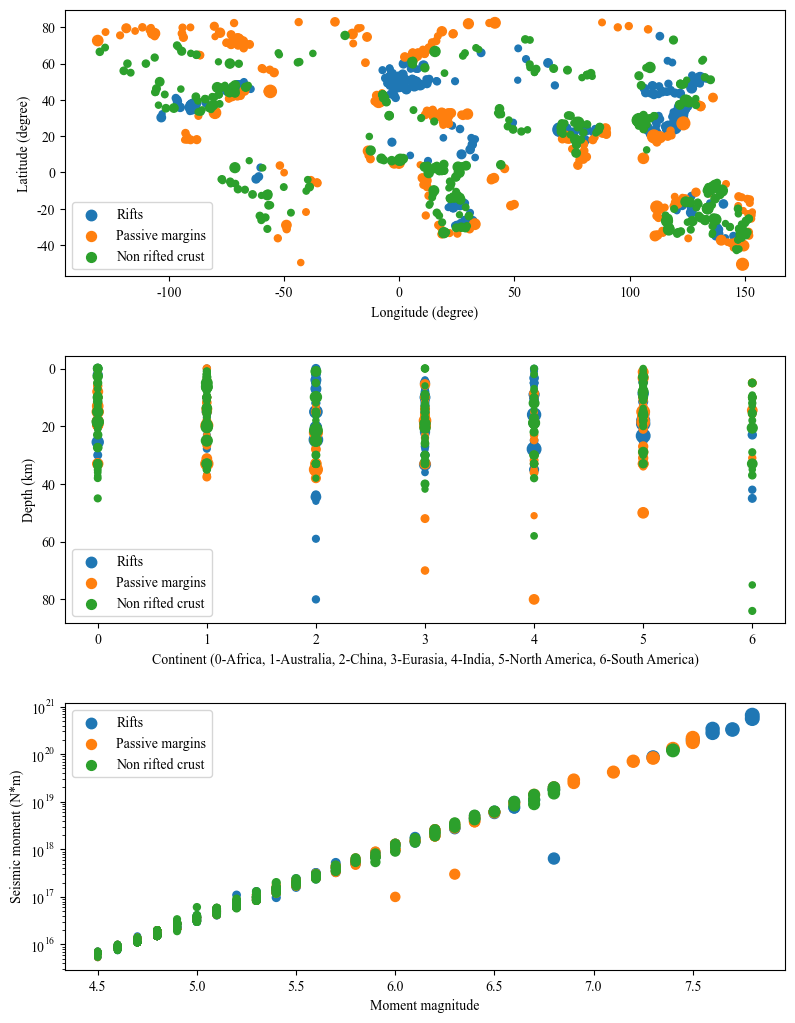

In [3]:
names=['Rifts','Passive margins','Non rifted crust']
feature_names=['Latitude (degree)','Longitude (degree)','Continent (0-Africa, 1-Australia, 2-China, 3-Eurasia, 4-India, 5-North America, 6-South America)','Depth (km)','Moment magnitude','Seismic moment (N*m)']

plt.figure(figsize=(9,12))
plt.subplot(3,1,1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.scatter(X_plot[:, 1], X_plot[:, 0], marker='o', s=X_plot[:,4]**3/5, label=target_name)
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[0])
plt.legend();

ax=plt.subplot(3,1,2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.scatter(X_plot[:, 2], X_plot[:, 3], marker='o', s=X_plot[:,4]**3/5, label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.legend();
ax.invert_yaxis()

plt.subplot(3,1,3)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.scatter(X_plot[:, 4], X_plot[:, 5], marker='o', s=X_plot[:,4]**3/5, label=target_name)
plt.xlabel(feature_names[4])
plt.ylabel(feature_names[5])
plt.legend();
plt.yscale('log')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

### 4. Configure dense neural network models

Now we configure the dense neural networks and we take a look at the summary of the models.

In [5]:
def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 10, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 3)      

### 5. Train the models

Let’s now run the training. We additionally use Tensorboard as a callback if we want to explore the model and the outputs in detail.

Model name: model_1
Test loss: 0.9733251333236694
Test accuracy: 0.5573770403862
8/8 [==============================] - 0s 997us/step
Accuracy: 0.5573770491803278
Precision: 0.5677828773658655
Recall: 0.5500903342366756
F1-score: 0.5498505622344632
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.74      0.64        90
           1       0.70      0.53      0.60        72
           2       0.44      0.38      0.41        82

    accuracy                           0.56       244
   macro avg       0.57      0.55      0.55       244
weighted avg       0.56      0.56      0.55       244



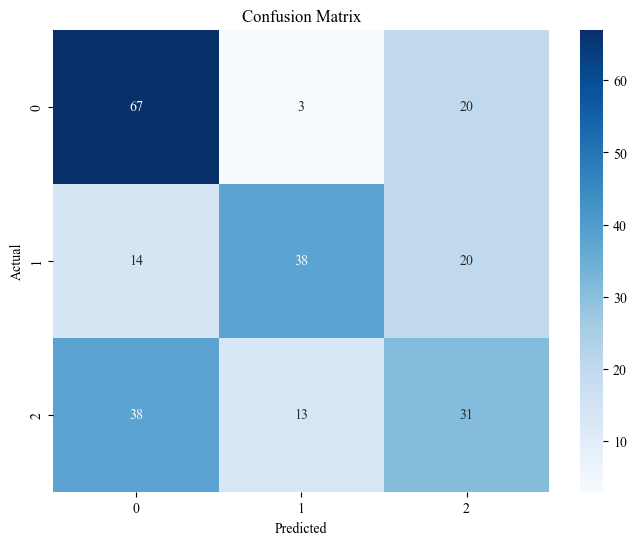



Model name: model_2
Test loss: 0.8645130395889282
Test accuracy: 0.6065573692321777
8/8 [==============================] - 0s 2ms/step
Accuracy: 0.6065573770491803
Precision: 0.642007036122105
Recall: 0.6001580849141824
F1-score: 0.6088825748268473
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.72      0.66        90
           1       0.83      0.54      0.66        72
           2       0.49      0.54      0.51        82

    accuracy                           0.61       244
   macro avg       0.64      0.60      0.61       244
weighted avg       0.63      0.61      0.61       244



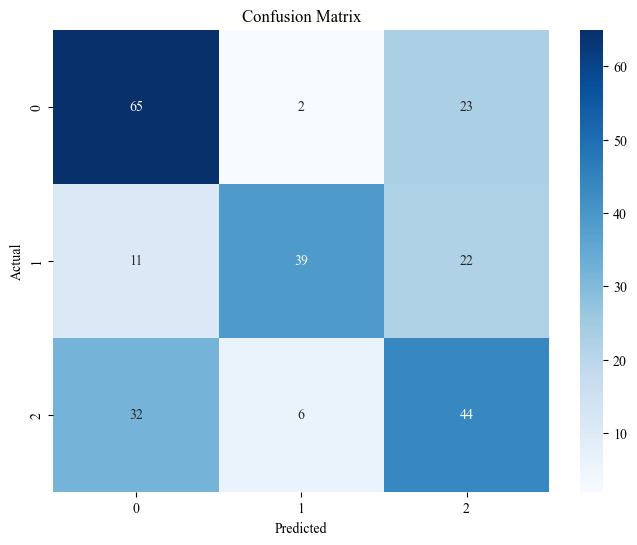



Model name: model_3
Test loss: 0.8781399130821228
Test accuracy: 0.5819672346115112
8/8 [==============================] - 0s 1ms/step
Accuracy: 0.5819672131147541
Precision: 0.594751803498364
Recall: 0.5807136404697381
F1-score: 0.5856030581555499
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63        90
           1       0.68      0.58      0.63        72
           2       0.46      0.54      0.50        82

    accuracy                           0.58       244
   macro avg       0.59      0.58      0.59       244
weighted avg       0.59      0.58      0.59       244



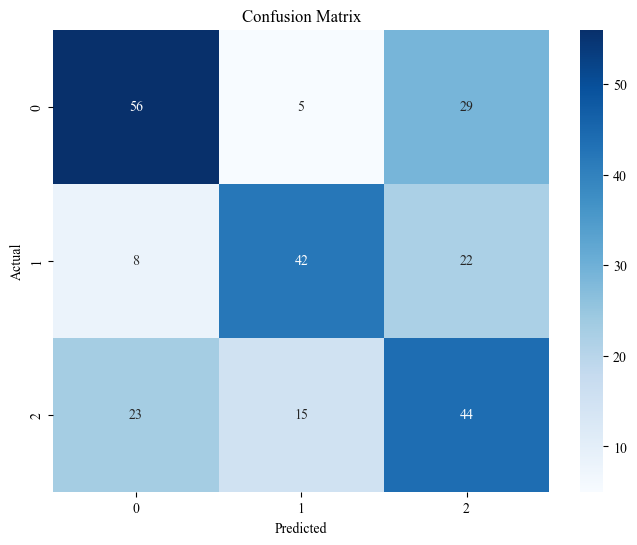

In [6]:
history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=16,
                                 epochs=100,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]
    
    Y_test_pred=model.predict(X_test)
    Y_test_pred_f=np.argmax(Y_test_pred, axis=1)
    print('Accuracy:', accuracy_score(Y_test_f, Y_test_pred_f))
    print('Precision:', precision_score(Y_test_f, Y_test_pred_f, average='macro'))
    print('Recall:', recall_score(Y_test_f, Y_test_pred_f, average='macro'))
    print('F1-score:', f1_score(Y_test_f, Y_test_pred_f, average='macro'))
    
    report = classification_report(Y_test_f, Y_test_pred_f, target_names=[str(i) for i in range(3)])
    print("Classification Report:\n", report)
    
    conf_matrix = confusion_matrix(Y_test_f, Y_test_pred_f)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print('\n')

### 6. Plot accuracy and loss from training

Let’s have a look how our models perform.

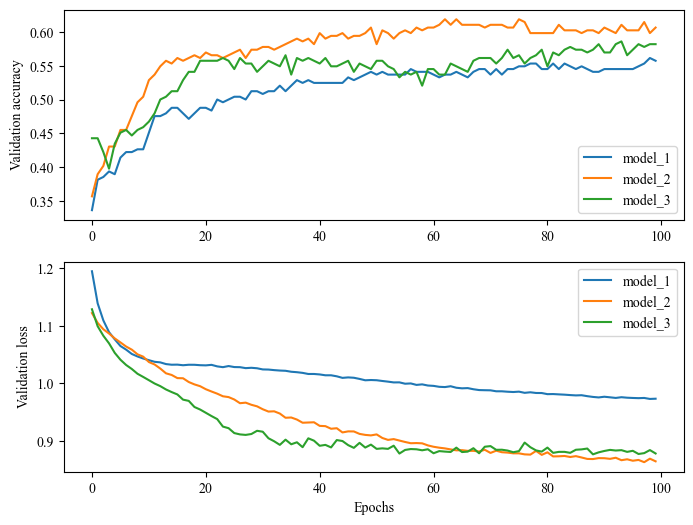

In [7]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('Validation accuracy')
ax2.set_ylabel('Validation loss')
ax2.set_xlabel('Epochs')
ax1.legend()
ax2.legend();

### 7. Outcome

Based on the results above, model_1 and model_3 may lead to under-fitting and over-fitting, respectively. So, we think model_2 is the best model. Its accuracy, precision, recall, and F1-score of testing is about 0.6066, 0.6420, 0.6002, and 0.6089 respectively.

# Classification using a Random Forest 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings        # Allows the code to ignore uneccessary warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
df=pd.read_csv('data_after_preprocessing.csv')
df.info()

#Define features and target
X = df[['Latitude','Longitude','Continent','Depth','Moment magnitude','Seismic moment']].values
Y = df[['Tectonic association']].values.reshape(X.shape[0])

# Scale data to have mean 0 and variance 1, which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Latitude              1216 non-null   float64
 1   Longitude             1216 non-null   float64
 2   Continent             1216 non-null   float64
 3   Depth                 1216 non-null   float64
 4   Moment magnitude      1216 non-null   float64
 5   Seismic moment        1216 non-null   float64
 6   Tectonic association  1216 non-null   float64
dtypes: float64(7)
memory usage: 66.6 KB


### 1. Display Dataset

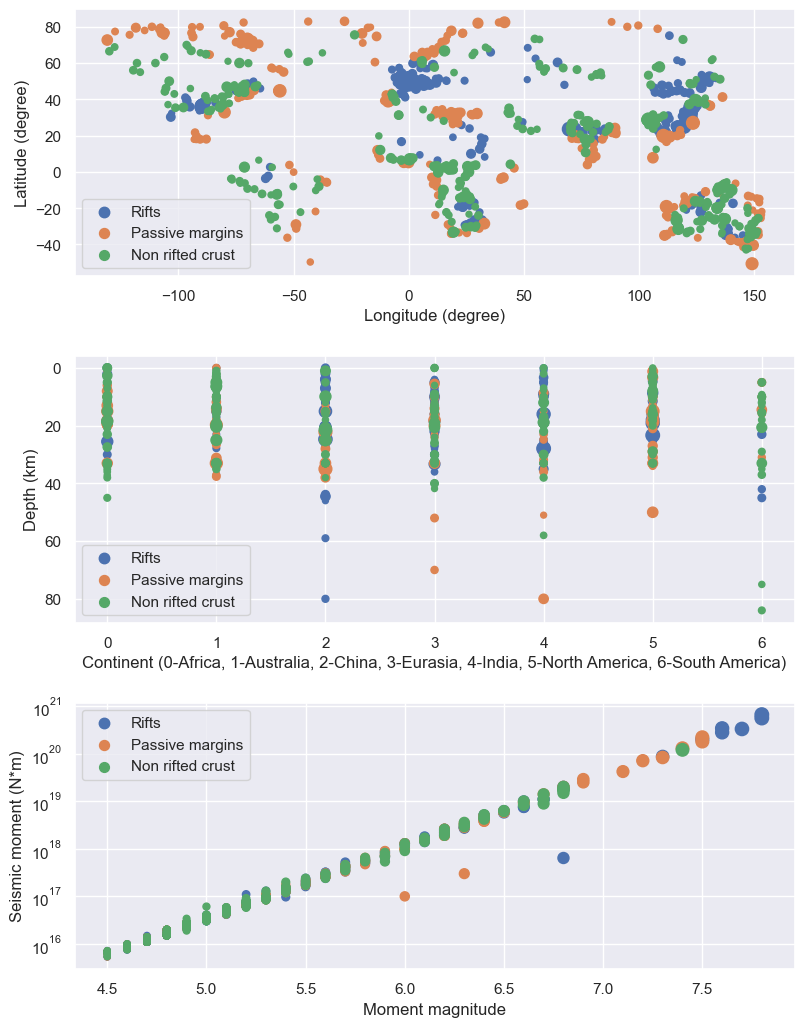

In [15]:
names=['Rifts','Passive margins','Non rifted crust']
feature_names=['Latitude (degree)','Longitude (degree)','Continent (0-Africa, 1-Australia, 2-China, 3-Eurasia, 4-India, 5-North America, 6-South America)','Depth (km)','Moment magnitude','Seismic moment (N*m)']

plt.figure(figsize=(9,12))
plt.subplot(3,1,1)
for target, target_name in enumerate(names):
    X_plot = X[Y == target]
    plt.scatter(X_plot[:, 1], X_plot[:, 0], marker='o', s=X_plot[:,4]**3/5, label=target_name)
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[0])
plt.legend();

ax=plt.subplot(3,1,2)
for target, target_name in enumerate(names):
    X_plot = X[Y == target]
    plt.scatter(X_plot[:, 2], X_plot[:, 3], marker='o', s=X_plot[:,4]**3/5, label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.legend();
ax.invert_yaxis()

plt.subplot(3,1,3)
for target, target_name in enumerate(names):
    X_plot = X[Y == target]
    plt.scatter(X_plot[:, 4], X_plot[:, 5], marker='o', s=X_plot[:,4]**3/5, label=target_name)
plt.xlabel(feature_names[4])
plt.ylabel(feature_names[5])
plt.legend();
plt.yscale('log')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

### 2. Build and train a classifier on training data, and then verify on test data

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy on the test data: {accuracy:.2f}")

Accuracy on the test data: 0.77


### 3. Classification report and Confusion matrix 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        90
           1       0.83      0.76      0.80        72
           2       0.72      0.73      0.73        82

    accuracy                           0.77       244
   macro avg       0.78      0.77      0.77       244
weighted avg       0.78      0.77      0.77       244



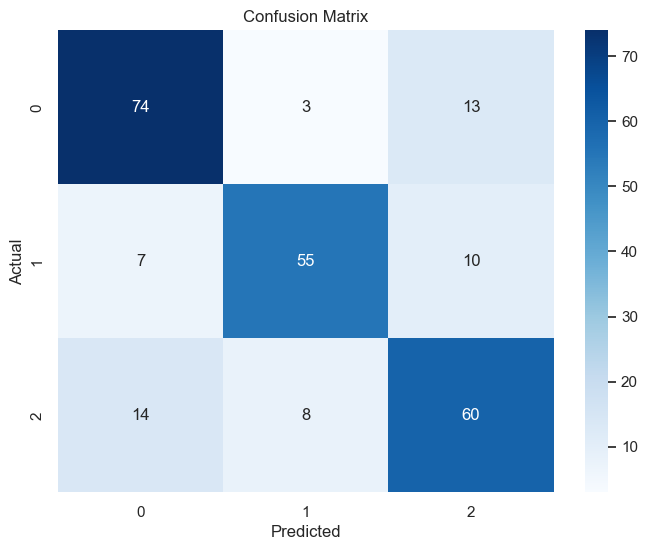

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


report = classification_report(Y_test, y_pred, target_names=[str(i) for i in range(3)])
print("Classification Report:\n", report)


conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 4. Outcome

Random forests are a powerful method with several advantages: Both training and prediction are very fast, because of the simplicity of the underlying decision trees.  
A primary disadvantage of random forests is that the results are not easily interpretable: that is, if you would like to draw conclusions about the meaning of the classification model, random forests may not be the best choice.

# Classification using a Support Vector Machine

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

### 1. Display Dataset

In [13]:
df=pd.read_csv('data_after_preprocessing.csv')
df.head()

,Latitude,Longitude,Continent,Depth,Moment magnitude,Seismic moment,Tectonic association
0,37.5,121.5,2.0,21.334715,5.2,7.600000e+16,2.0
1,51.1,12.8,3.0,19.450478,4.8,1.900000e+16,0.0
2,31.8,119.9,2.0,21.323722,4.9,2.100000e+16,0.0
3,49.0,12.0,3.0,19.013679,5.5,1.700000e+17,0.0
4,23.6,116.5,2.0,20.445688,6.1,1.700000e+18,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Latitude              1216 non-null   float64
 1   Longitude             1216 non-null   float64
 2   Continent             1216 non-null   float64
 3   Depth                 1216 non-null   float64
 4   Moment magnitude      1216 non-null   float64
 5   Seismic moment        1216 non-null   float64
 6   Tectonic association  1216 non-null   float64
dtypes: float64(7)
memory usage: 66.6 KB


In [15]:
X = df.drop('Tectonic association', axis=1)  # Features
y = df['Tectonic association']  # Target

# Scale data to have mean 0 and variance 1, which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [16]:
X.shape[1]

6

### 2. Build and train a classifier (poly kernel) on training data

In [36]:
svm = SVC(kernel='poly',C =1000, random_state=2) 
svm.fit(X_train, y_train)

SVC(C=1000, kernel='poly', random_state=2)

### 3. Verify classifier (poly kernel) on test data, Classification report and Confusion matrix 

In [37]:
predictions = svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, predictions))

Accuracy: 0.59
              precision    recall  f1-score   support

         0.0       0.57      0.78      0.66        90
         1.0       0.81      0.47      0.60        72
         2.0       0.49      0.48      0.48        82

    accuracy                           0.59       244
   macro avg       0.62      0.58      0.58       244
weighted avg       0.61      0.59      0.58       244



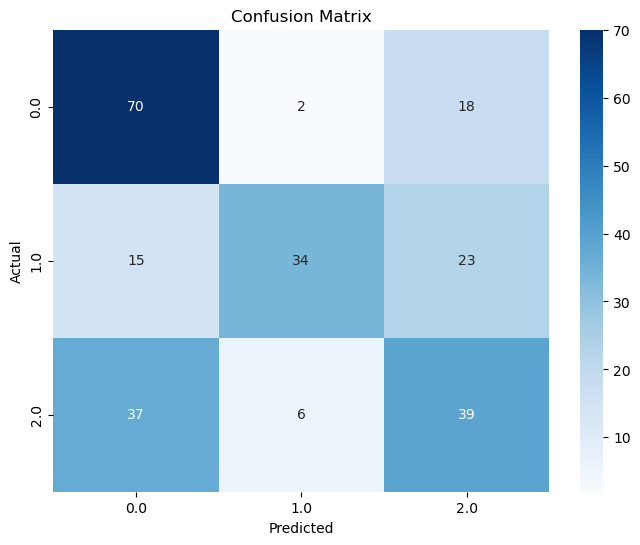

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 4. Build and train a classifier (rbf kernel) on training data

In [57]:
svm = SVC(kernel='rbf', C = 1E5,  random_state=42) 
svm.fit(X_train, y_train)

SVC(C=100000.0, random_state=42)

### 5. Verify classifier (poly kernel) on test data, Classification report and Confusion matrix 

In [58]:
predictions = svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, predictions))

Accuracy: 0.64
              precision    recall  f1-score   support

         0.0       0.62      0.70      0.66        90
         1.0       0.75      0.68      0.72        72
         2.0       0.55      0.52      0.54        82

    accuracy                           0.64       244
   macro avg       0.64      0.63      0.64       244
weighted avg       0.64      0.64      0.64       244



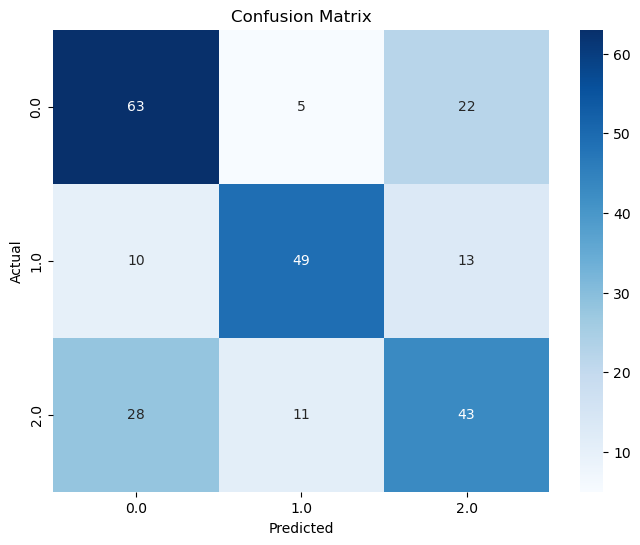

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 6. Outcome

SVMs can be effective classifiers for earthquake data, but the suitability of any machine learning algorithm depends on various factors, including the nature and complexity of the data, feature representation, and the problem you're trying to solve.

For earthquake data classification, SVMs can be useful due to their ability to handle high-dimensional data and find complex decision boundaries. However, their performance might be affected by factors such as:

1. Data Size and Imbalance: If the dataset is very large, SVMs might take longer to train. Additionally, if the classes are highly imbalanced (e.g., one class significantly more frequent than others), SVMs might not perform optimally without proper handling of class imbalance.

2. Feature Engineering: Proper feature selection or engineering can significantly impact SVM performance. Identifying the right features that capture essential aspects of seismic events is crucial.

3. Kernel Selection and Parameters: The choice of the kernel function (linear, polynomial, radial basis function, etc.) and tuning the associated parameters (C for regularization, kernel-specific parameters like degree for polynomial kernel, gamma for RBF kernel) is essential. The performance can vary with different kernel choices and parameter settings.

4. Interpretability vs. Performance: SVMs can create complex decision boundaries, which might lead to reduced interpretability of the model. In some cases, simpler models might be preferred for interpretability, even if they sacrifice a bit of predictive power.

5. Computational Complexity: SVMs might become computationally expensive, especially with large datasets or complex kernels, making them less practical for real-time or resource-constrained applications.

Alternative algorithms like decision trees, random forests, gradient boosting, or neural networks can also be used for earthquake data classification. The choice often depends on empirical performance, computational resources available, and interpretability requirements.

For this earthquake data, we found SVM are not a very good model for interpretation. We experimented with polynomial and rbf kernels with variable C parameters but none of them provided good model accuracy

# Conclusion


#### The report explores the use of machine learning for classifying intraplate earthquakes, finding that Random Forest outperforms dense neural network and support vector machine models in terms of accuracy, precision, recall, and F1-score. The analysis highlights that distinguishing the 'rifts' class is more successful than that of 'passive margins' and 'non-rifted crust' classes, as indicated by the confusion matrix. Our findings suggest that improving classification accuracy could be achieved by incorporating additional features related to focal mechanisms into the dataset. However, there is a challenges in obtaining such features for ancient intraplate earthquakes, mainly due to the absence of seismic records.